In [1]:

from gas import GasPerMnemonic
from entropy import getEntropy

Entropy = getEntropy()
NormalOps = GasPerMnemonic()[0]
SpecialOps = GasPerMnemonic()[1]



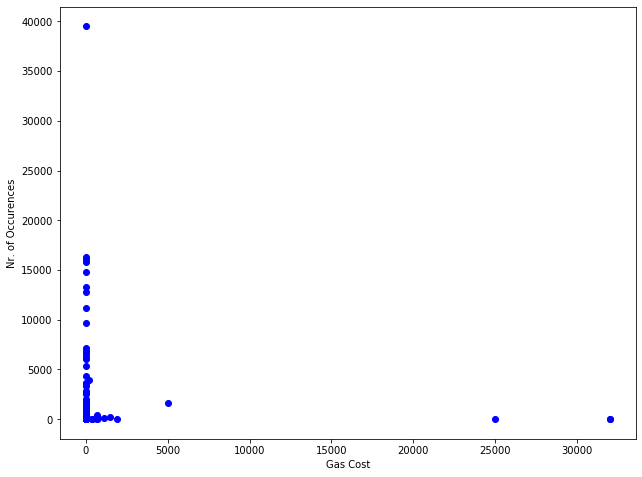

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

for key in Entropy:
    if key in NormalOps:
        x.append(NormalOps[key])
        y.append(Entropy[key])

fig=plt.figure(figsize=(8, 6))
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='b')
ax.set_xlabel('Gas Cost')
ax.set_ylabel('Nr. of Occurences')
plt.show()

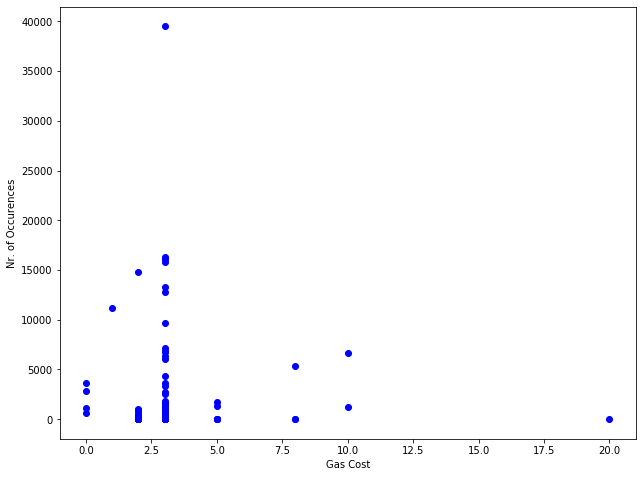

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

xLimit = 20
yLimit = 100000000

for key in Entropy:
    if Entropy[key]<=yLimit:
        if key in NormalOps and NormalOps[key] <=xLimit:
            x.append(NormalOps[key])
            y.append(Entropy[key])

fig=plt.figure(figsize=(8, 6))
ax=fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='b')
ax.set_xlabel('Gas Cost')
ax.set_ylabel('Nr. of Occurences')
plt.show()

In [11]:
from classification import classify

def clean(str): # deletes last two\one characters if are digits 
    if str[-2:].isdigit():
        return str[:-2]
    elif str[-1].isdigit():
        return str[:-1]
    return str

Classes = classify()
ClassEntropy = {}

for key in Classes:
    ClassEntropy[key] = 0
    
for mnemonic in Entropy:
    for key in Classes:
        if clean(mnemonic) in Classes[key]:
            ClassEntropy[key] += Entropy[mnemonic]

            
ClassEntropy = {k: v for k, v in sorted(ClassEntropy.items(), key=lambda item: item[1], reverse=True)}


{'StackMemory': 171733, 'ProcessFlow': 26041, 'Arithmetic': 21407, 'Logic': 19732, 'Environmental': 6493, 'System': 6261, 'Block': 249}


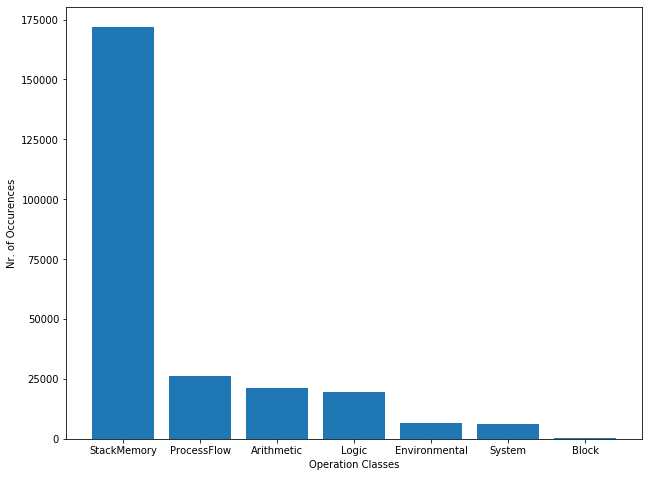

In [14]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0,0,1,1])
x = list(ClassEntropy.keys())
y = list(ClassEntropy.values())
ax.bar(x,y)
ax.set_xlabel('Operation Classes')
ax.set_ylabel('Nr. of Occurences')
plt.show()